# Description
To model the production of power I had to get data from solar panels. Luckily a colleague at Volvo was kind enough to provide me with two days of power production, one day in June and one in December, for his two systems. To model the system, for each system I take the december and june day and interpolate their power production.

## System Information
- Two systems of 15.7kWp and 12kWp each with a 12kW and 10kW inverted respectively
- The 15.7kWp system, referred to as yellow, has panels pointing in SE and SW. 
- The 12kWp system, referred to as brown, has panels pointing
- Roof angle 40 degreees
- Main fuse 25A ( which limits to 17.5kW grid output )

Below I have attached the screen shots of the information this model is deferred from.

## Power Production June Stacked ( Yellow 15.7kWp, Brown 12kWp)
![title](data/power_production_june.png)

## Power Production December Stacked ( Yellow 15.7kWp, Brown 12kWp)
![title](data/power_production_december.png)

## System Description
![title](data/system_desc.png)

In [2]:
# values correspond hourly 00:00 to 23:00
hourly_kWh_prod_june_15_7kWp_system=[0,0,0,0,0,0.1,1.2,3.4,5.7,7.8,9.4,11.1,11.7,10.5,11.1,10,8.1,5.7,3.3,2,0.6,0.1,0.1,0]
hourly_kWh_prod_december_15_7kWp_system=[0,0,0,0,0,0,0,0,0,0.4,2.2,3,1.3,0.5,0.4,0.1,0,0,0,0,0,0,0,0]
hourly_kWh_prod_june_combined_system=[0,0,0,0,0,0.7,4,8.1,12.1,15.8,17.9,17.9,17.8,16.3,16.5,15.7,12.1,8,4.3,2.7,0.9,0.1,0.1,0]
hourly_kWh_prod_december_combined_system=[0,0,0,0,0,0,0,0,0,0.9,3.9,4.4,2.6,1.6,0.9,0.2,0,0,0,0,0,0,0,0]

In [3]:
import numpy as np
hourly_kWh_prod_june_15_7kWp_system = np.array(hourly_kWh_prod_june_15_7kWp_system)
hourly_kWh_prod_december_15_7kWp_system = np.array(hourly_kWh_prod_december_15_7kWp_system)
hourly_kWh_prod_june_combined_system = np.array(hourly_kWh_prod_june_combined_system)
hourly_kWh_prod_december_combined_system = np.array(hourly_kWh_prod_december_combined_system)
hourly_kWh_prod_june_12kWp_system = hourly_kWh_prod_june_combined_system - hourly_kWh_prod_june_15_7kWp_system
hourly_kWh_prod_december_12kWp_system = hourly_kWh_prod_december_combined_system - hourly_kWh_prod_december_15_7kWp_system

In [4]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>


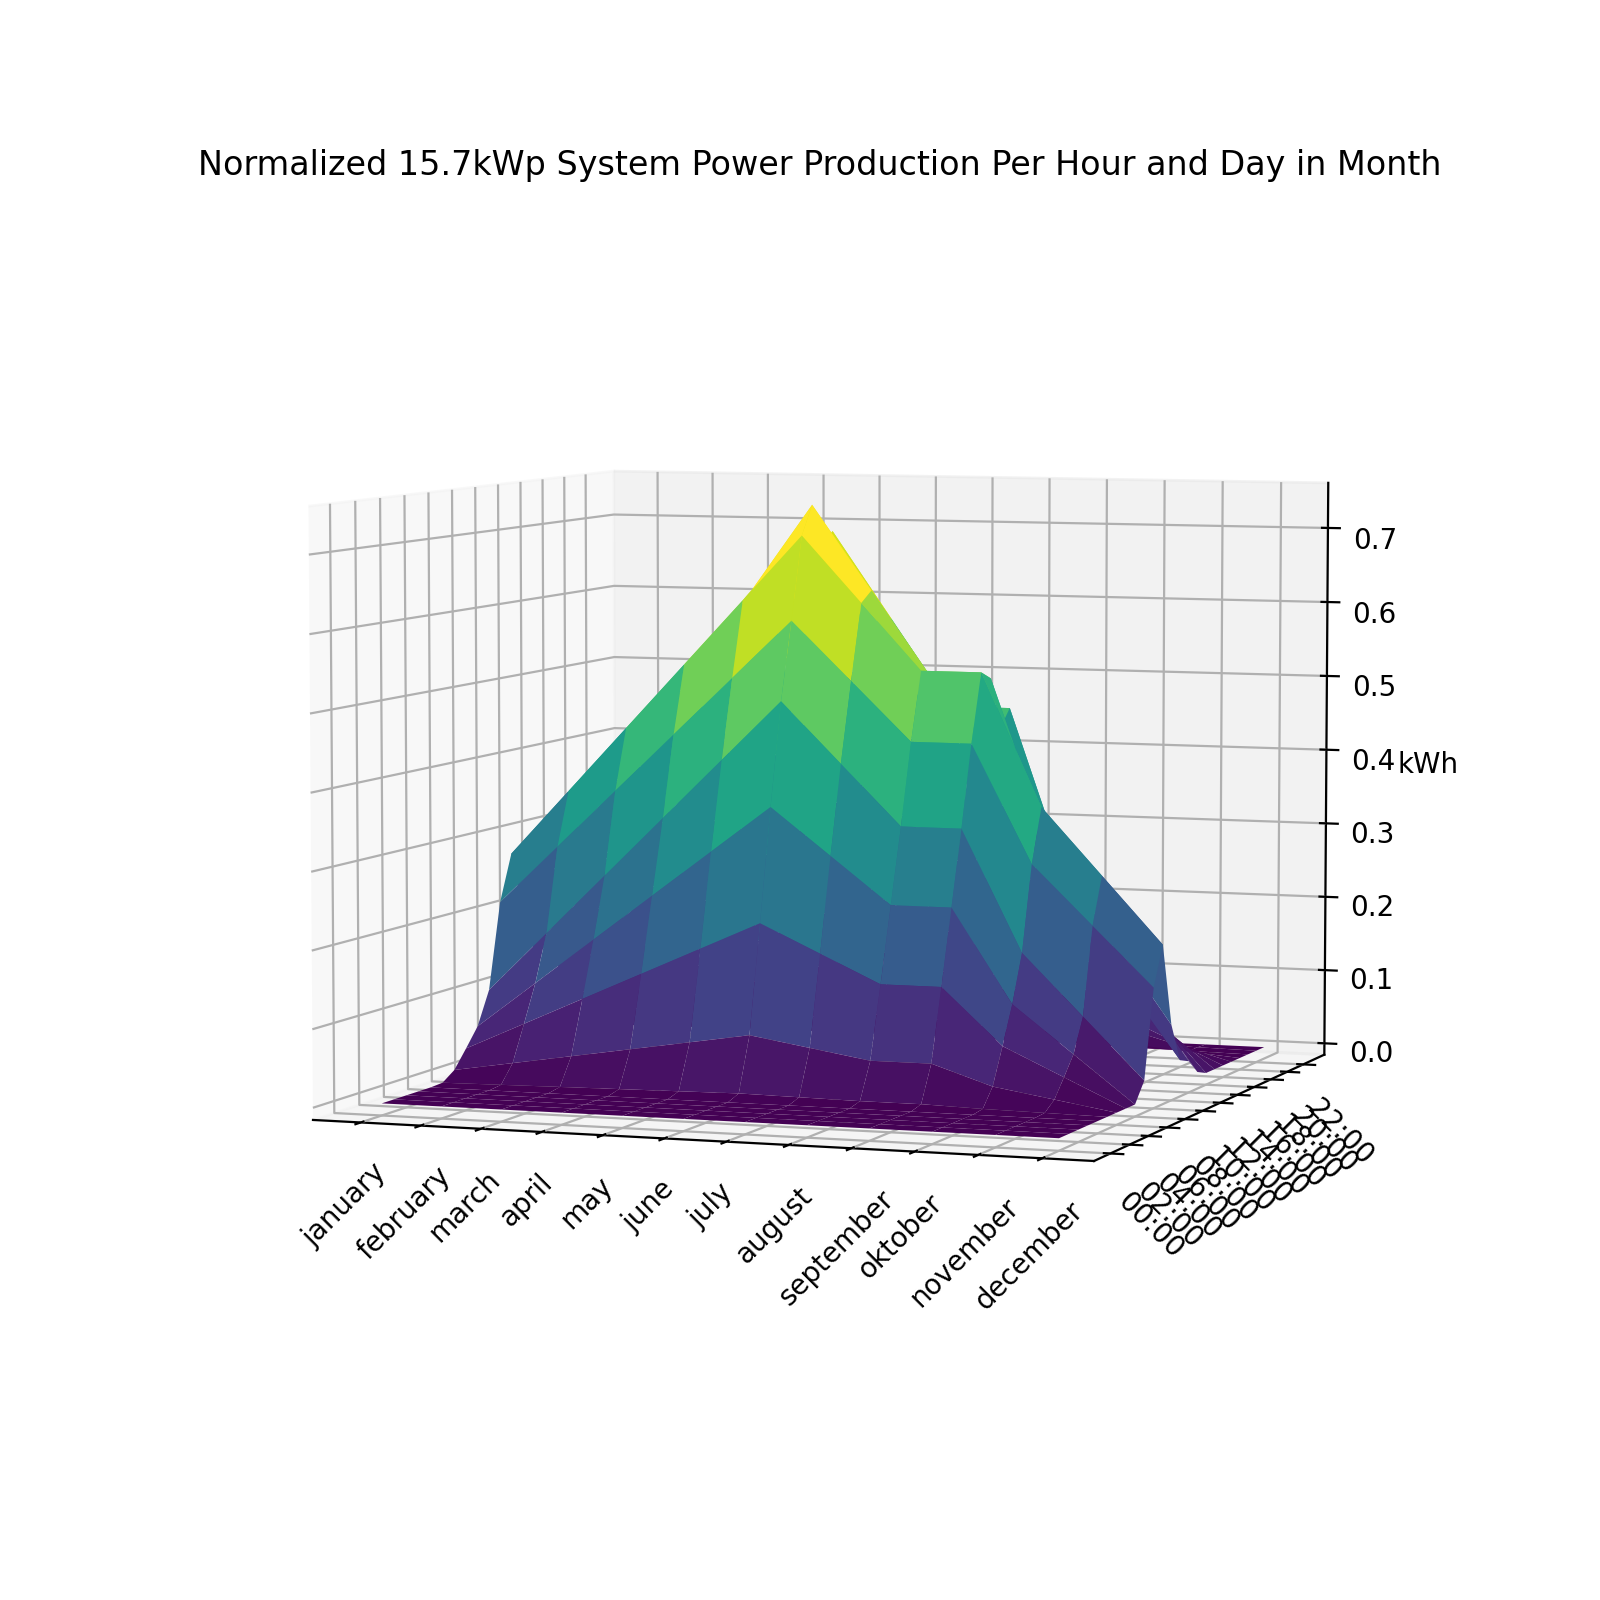

<IPython.core.display.Javascript object>


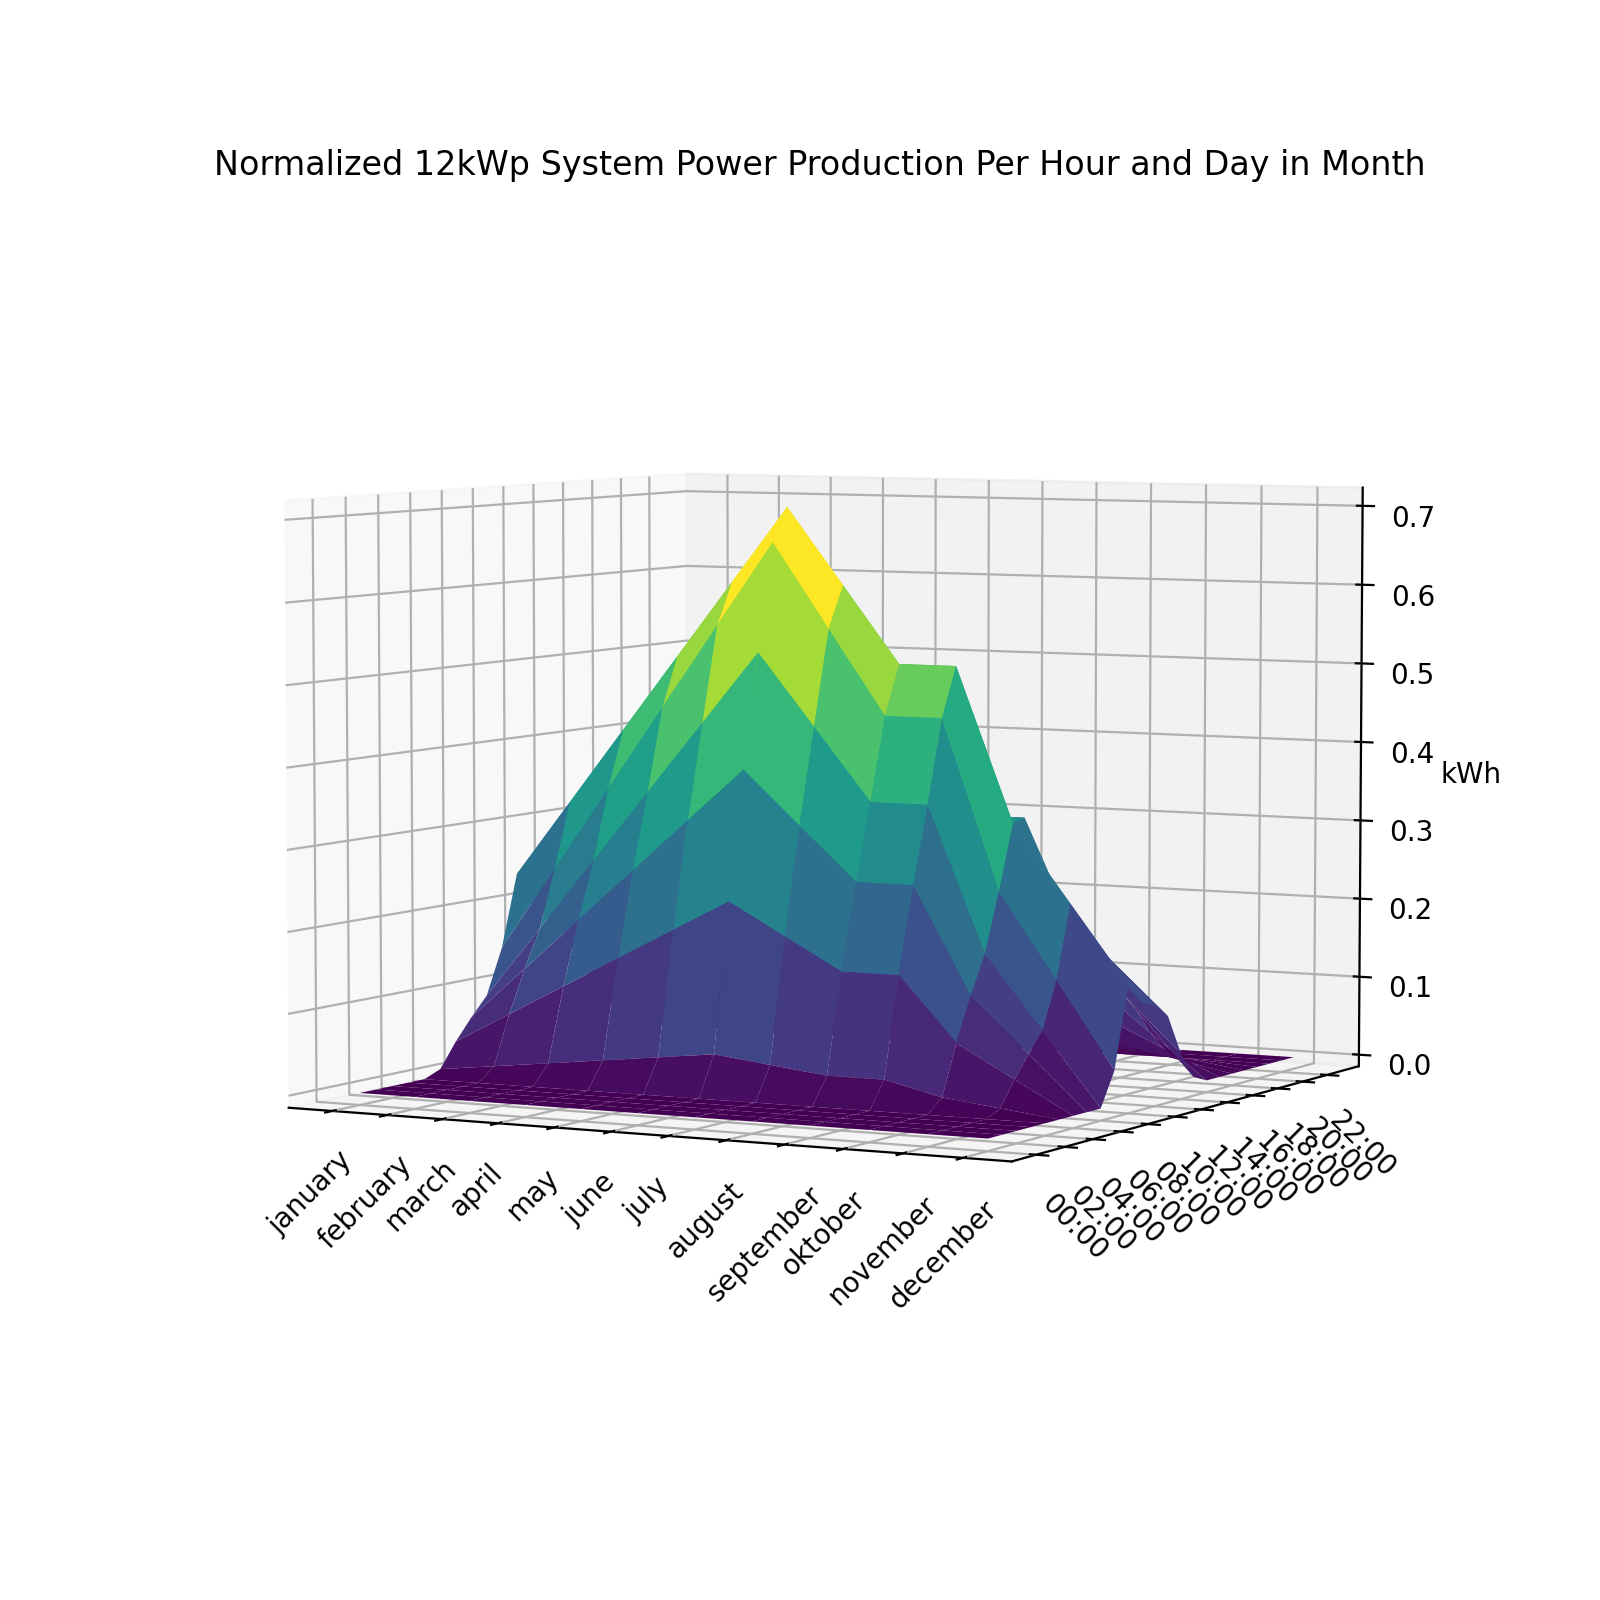

TypeError: save() missing 1 required positional argument: 'arr'

In [5]:
def interpolate(december_prod, june_prod):
    spring_prod = np.interp(np.array([1,2,3,4,5]), np.array([0, 6]), np.array([december_prod, june_prod]))
    autumn_prod = np.interp(np.array([7,8,8,10,11]), np.array([6, 12]), np.array([june_prod, december_prod]))
    
    output = np.array([])
    output = np.append(output, spring_prod)
    output = np.append(output, june_prod)
    output = np.append(output, autumn_prod)
    output = np.append(output, december_prod)
    return output

def model_15_7kWp_system():
    data = []
    for i in range(0, 24):
        power_prod = interpolate(hourly_kWh_prod_december_15_7kWp_system[i], hourly_kWh_prod_june_15_7kWp_system[i])
        data.append(power_prod)
    return np.array(data)

def model_12kWp_system():
    data = []
    for i in range(0, 24):
        power_prod = interpolate(hourly_kWh_prod_december_12kWp_system[i], hourly_kWh_prod_june_12kWp_system[i])
        data.append(power_prod)
    return np.array(data)

%matplotlib notebook
def plot_3D(model, title):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    x = np.arange(12)
    y = np.arange(24)
    x,y = np.meshgrid(x,y)
    
    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(projection ='3d')
    ax.set_title(title)    
    ax.plot_surface(x,y,model, cmap="viridis")
    ax.set_xticks(np.arange(12),["january", "february", "march", "april", "may", "june",
                "july", "august", "september", "oktober", "november", "december"], rotation=45)
    
    ax.set_yticks(np.arange(0,24,2), [f"{i:02}:00" for i in range(0, 24, 2)], rotation=-45)
    ax.set_zlabel('kWh')
    plt.show()

model_15_7kWp = model_15_7kWp_system()
normal_model_15_7kWp_system = model_15_7kWp / 15.7

model_12kWp = model_12kWp_system()
normal_model_12kWp_system = model_12kWp / 12

plot_3D(normal_model_15_7kWp_system, "Normalized 15.7kWp System Power Production Per Hour and Day in Month")
plot_3D(normal_model_12kWp_system, "Normalized 12kWp System Power Production Per Hour and Day in Month")

np.save("no")